### Check positional embedding

In [1]:
import math,torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
print ("Ready.")

Ready.


In [2]:
def torch2np(x_torch):
    x_np = x_torch.detach().cpu().numpy() # ndarray
    return x_np
print ("Ready.")

Ready.


In [3]:
class SinPositionEmbeddings(nn.Module):
    def __init__(self,dim,T=1000):
        super().__init__()
        self.dim = dim
        self.T = T
    @torch.no_grad()
    def forward(self,steps):
        device = steps.device
        half_dim = self.dim // 2
        embeddings = math.log(self.T) / (half_dim - 1)
        embeddings = torch.exp(torch.arange(half_dim, device=device) * -embeddings)
        embeddings = steps[:, None] * embeddings[None, :]
        embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)
        return embeddings
print ("Ready.")

Ready.


### Plot Sine Positional Embedding with different `embedding dimensions`

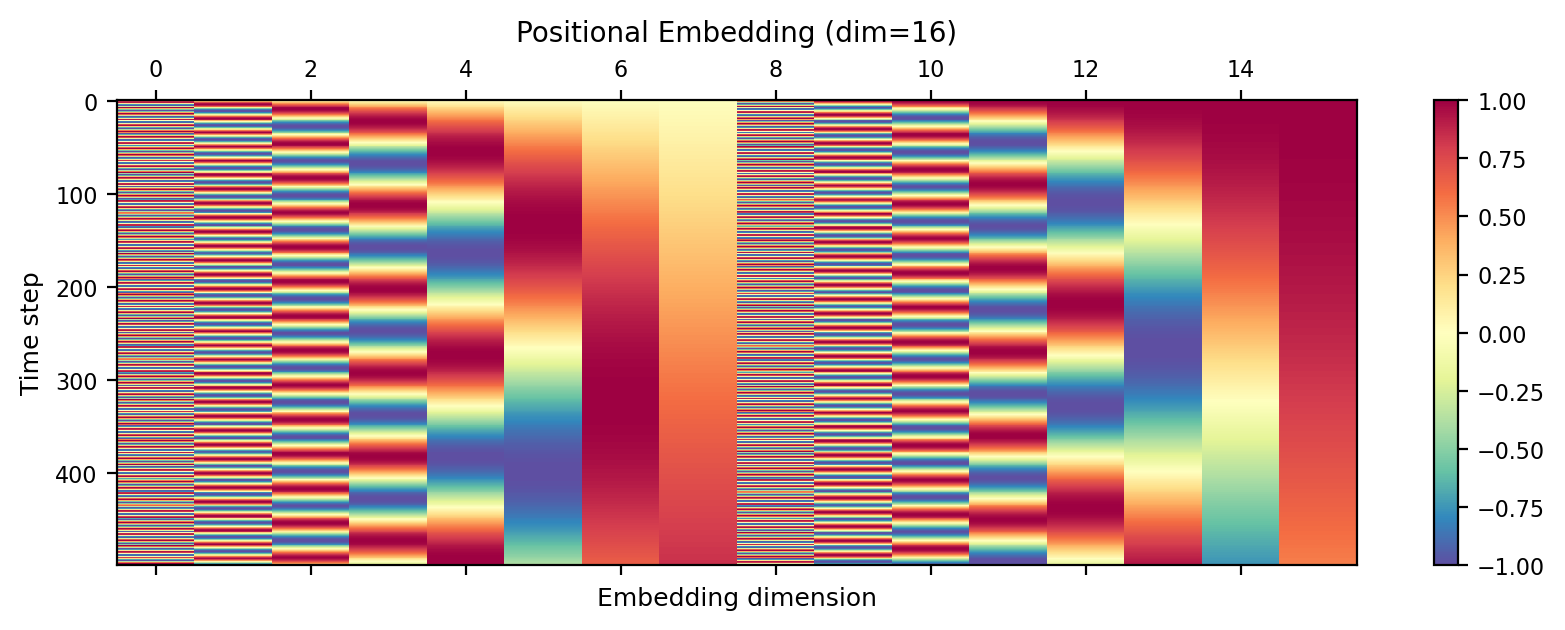

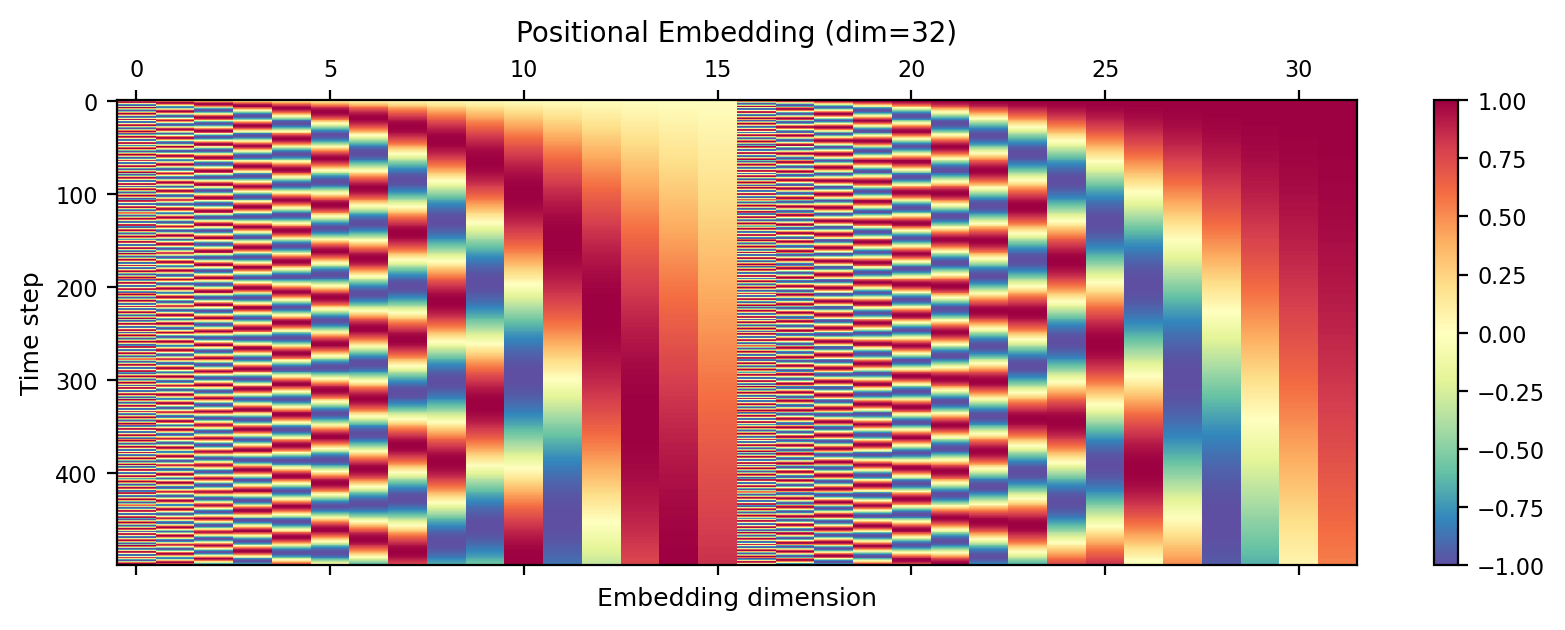

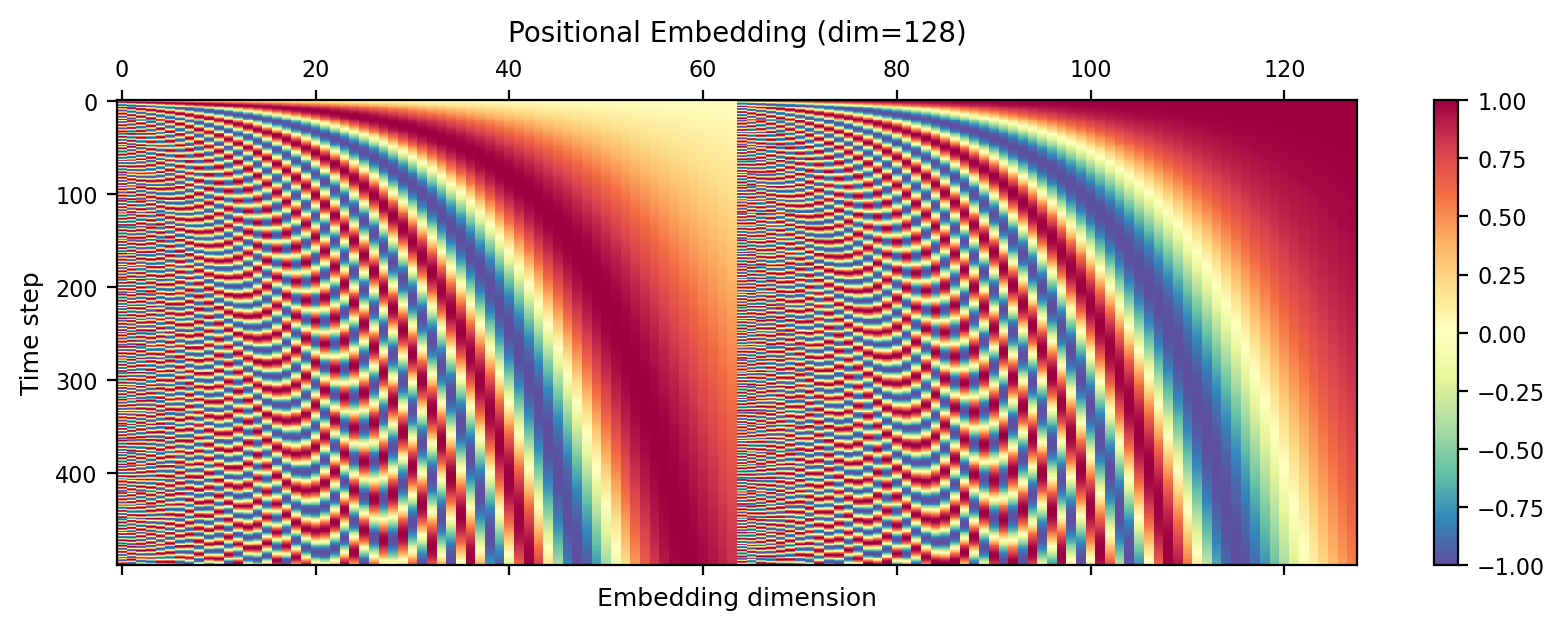

Ready.


In [4]:
max_step = 500
for emb_dim in [16,32,128]: # for different embedding dimensions
    steps = torch.arange(start=0,end=max_step,step=1)
    SPE = SinPositionEmbeddings(dim=emb_dim,T=max_step)
    pos_emb_mtx = torch2np(SPE(steps=steps))
    # Plot
    plt.figure(figsize=(10,3))
    plt.rc('xtick',labelsize=8); plt.rc('ytick',labelsize=8)
    plt.matshow(pos_emb_mtx,fignum=1,aspect='auto',cmap=plt.cm.Spectral_r)
    plt.xlabel('Embedding dimension',fontsize=9)
    plt.ylabel('Time step',fontsize=9)
    plt.colorbar(); plt.title('Positional Embedding (dim=%d)'%(emb_dim),fontsize=10) 
    plt.show()
print ("Ready.")

### Plot Sine Positional Embedding with different `steps`

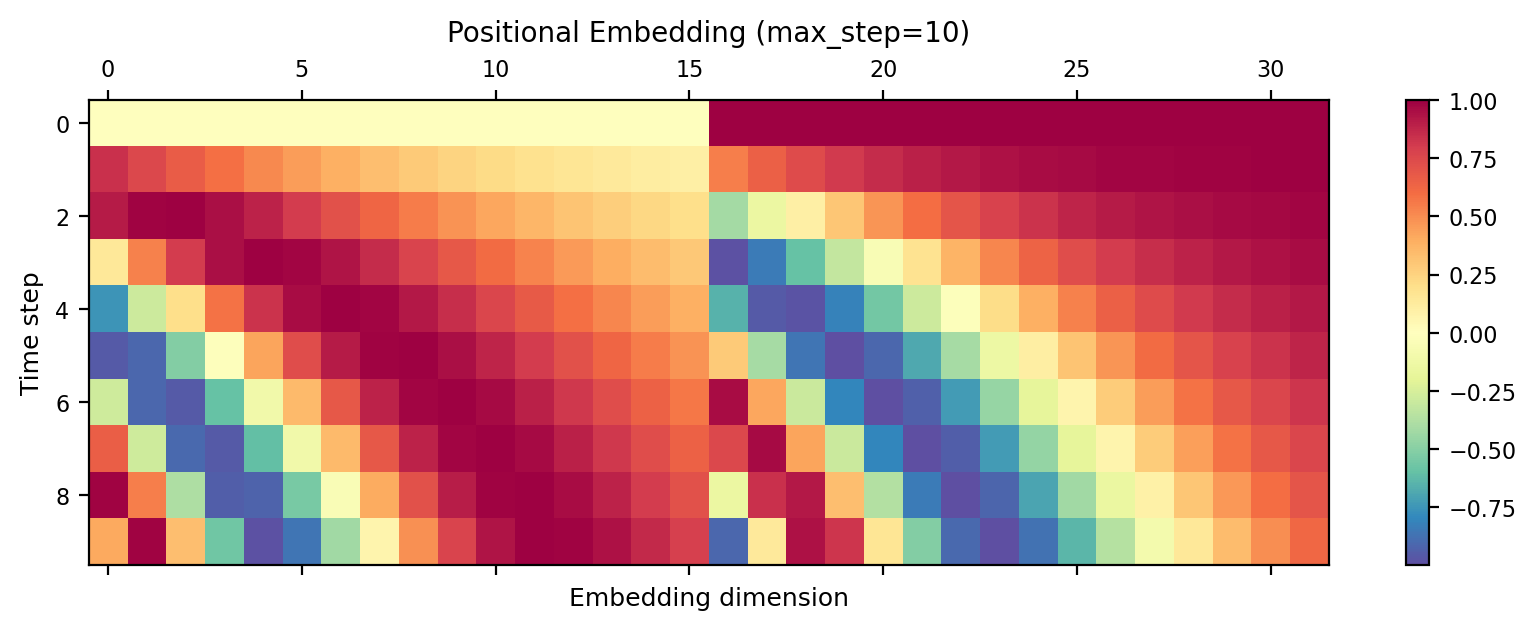

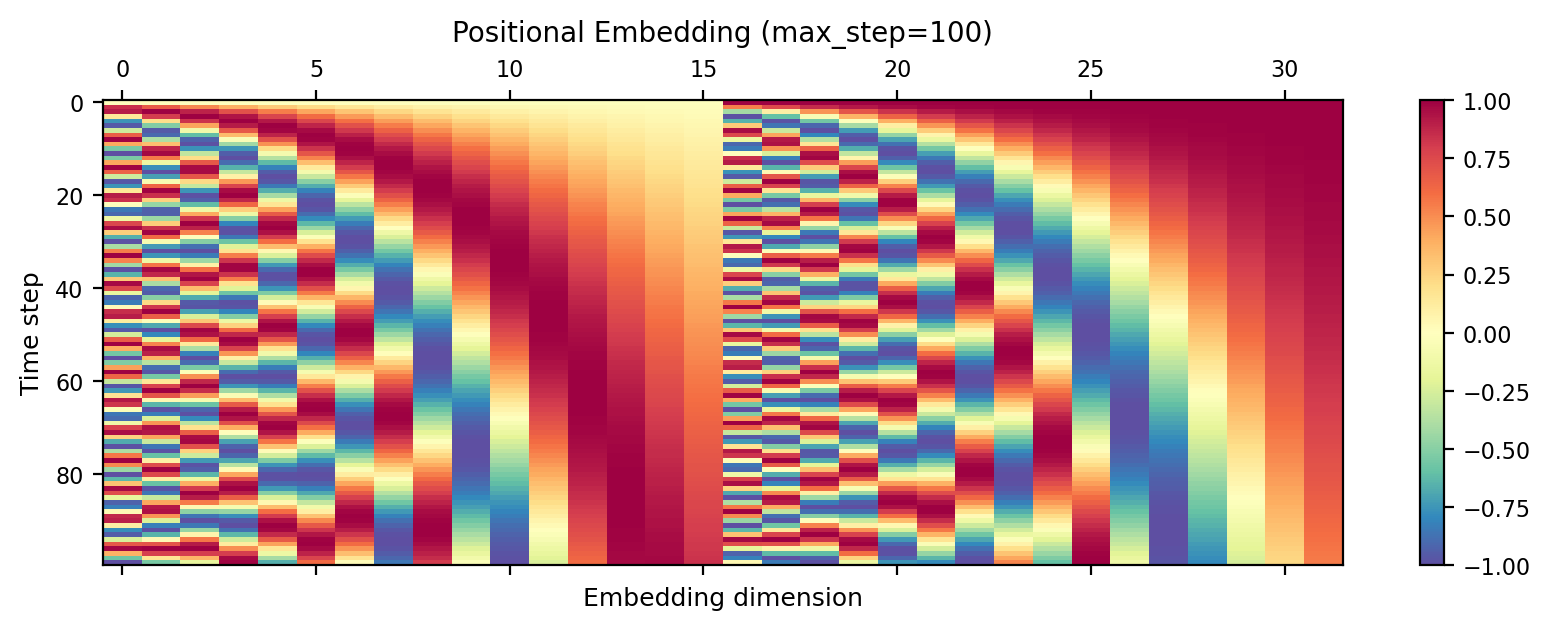

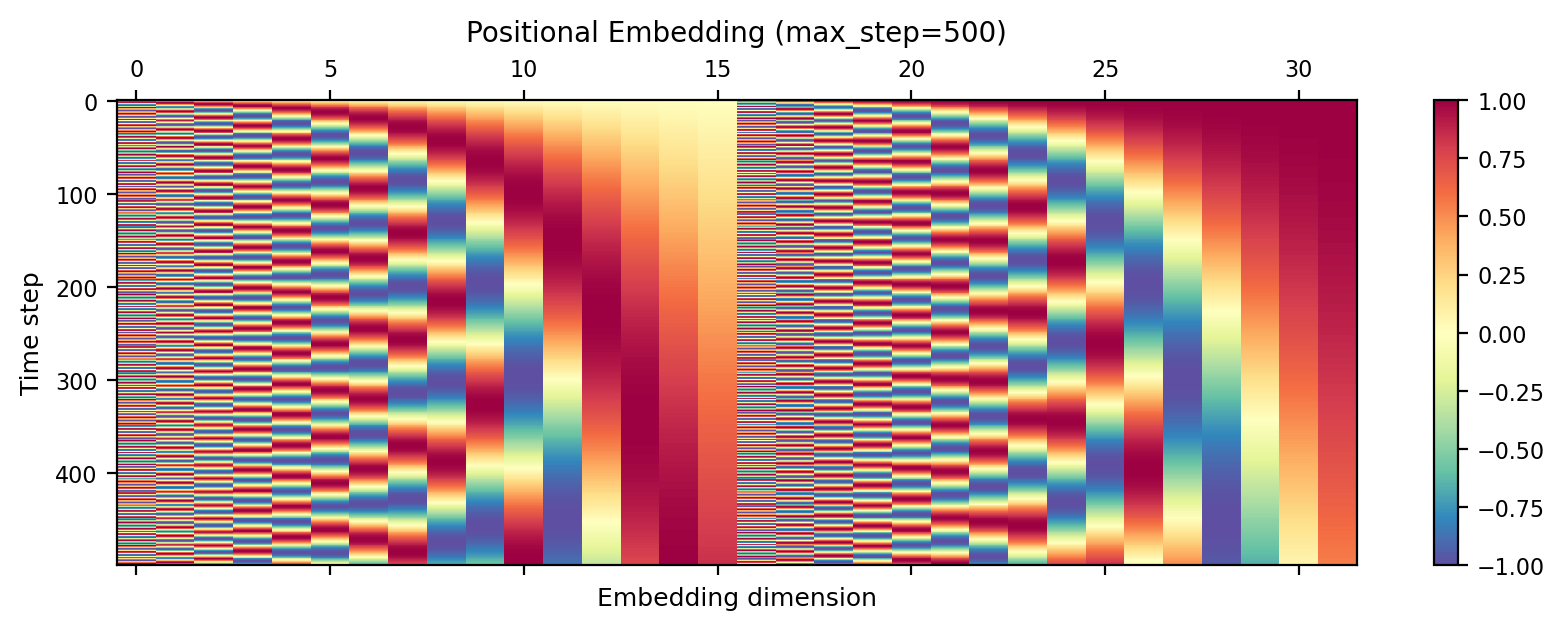

Ready.


In [5]:
emb_dim = 32
for max_step in [10,100,500]: # for different max steps
    steps = torch.arange(start=0,end=max_step,step=1)
    SPE = SinPositionEmbeddings(dim=emb_dim,T=max_step)
    pos_emb_mtx = torch2np(SPE(steps=steps))
    # Plot
    plt.figure(figsize=(10,3))
    plt.rc('xtick',labelsize=8); plt.rc('ytick',labelsize=8)
    plt.matshow(pos_emb_mtx,fignum=1,aspect='auto',cmap=plt.cm.Spectral_r)
    plt.xlabel('Embedding dimension',fontsize=9)
    plt.ylabel('Time step',fontsize=9)
    plt.colorbar(); plt.title('Positional Embedding (max_step=%d)'%(max_step),fontsize=10) 
    plt.show()
print ("Ready.")